In [21]:
import kedro.framework.cli.utils
import pandas as pd
import os
df = pd.read_csv(r"C:\Users\User\Desktop\ASI_REPO\smart-liquor-sales-predictor\asi\data\01_raw\oneMilRecordsLiquor.csv")

[11/26/23 20:48:35] WARNING  c:\Users\User\anaconda3\envs\ASI\lib\site-packages\IPython\core\intera ]8;id=730385;file://c:\Users\User\anaconda3\envs\ASI\lib\warnings.py\warnings.py]8;;\:]8;id=854730;file://c:\Users\User\anaconda3\envs\ASI\lib\warnings.py#110\110]8;;\
                             ctiveshell.py:3553: DtypeWarning: Columns (6) have mixed types.Specify                
                             dtype option on import or set low_memory=False.                                       
                               exec(code_obj, self.user_global_ns, self.user_ns)                                   
                                                                                                                   

In [22]:
df.head()

,invoice_line_no,date,store,name,address,city,zipcode,store_location,county_number,county,...,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons,:@computed_region_3r5t_5243,:@computed_region_wnea_7qqw,:@computed_region_i9mz_6gmt,:@computed_region_uhgg_e8y2,:@computed_region_e7ym_nrbf
0,INV-48770300006,2022-06-29T00:00:00.000,5900,NEW STAR FLETCHER / WATERLOO,315 FLETCHER AVE,WATERLOO,50701.0,"{'type': 'Point', 'coordinates': [-92.367142, ...",7.0,BLACK HAWK,...,5.25,24,126.00,9.0,2.37,145.0,18.0,240.0,35.0,176.0
1,INV-48782900001,2022-06-29T00:00:00.000,3390,OKOBOJI AVENUE LIQUOR,1610 OKOBOJI AVENUE,MILFORD,51351.0,"{'type': 'Point', 'coordinates': [-95.149955, ...",30.0,DICKINSON,...,5.96,288,1716.48,288.0,76.08,37.0,37.0,419.0,3.0,1779.0
2,INV-48703200006,2022-06-27T00:00:00.000,4604,PIT STOP LIQUORS / NEWTON,"1324, 1ST AVE E",NEWTON,50208.0,"{'type': 'Point', 'coordinates': [-93.035653, ...",50.0,JASPER,...,7.50,24,162.00,9.0,2.37,903.0,11.0,131.0,66.0,1791.0
3,INV-48692600064,2022-06-27T00:00:00.000,2552,HY-VEE FOOD STORE #3 / CEDAR RAPIDS,20 WILSON AVENUE WEST,CEDAR RAPIDS,52404.0,"{'type': 'Point', 'coordinates': [-91.658576, ...",57.0,LINN,...,20.99,6,116.64,10.5,2.77,793.0,18.0,264.0,45.0,287.0
4,INV-48679200008,2022-06-24T00:00:00.000,2523,HY-VEE FOOD STORE / CENTERVILLE,609 N 18TH,CENTERVILLE,52544.0,"{'type': 'Point', 'coordinates': [-92.867967, ...",4.0,APPANOOSE,...,12.99,12,155.88,9.0,2.37,210.0,54.0,534.0,98.0,175.0


In [23]:
len(df)

1000000

In [24]:
len(df[df.isnull().any(axis=1)])

418436

In [25]:
df = df.drop('county_number', axis=1)
len(df[df.isnull().any(axis=1)])

130381

In [26]:
df.dropna(inplace=True)

In [27]:
len(df)

869619

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
print(df.columns)

Index(['invoice_line_no', 'date', 'store', 'name', 'address', 'city',
       'zipcode', 'store_location', 'county', 'category', 'category_name',
       'vendor_no', 'vendor_name', 'itemno', 'im_desc', 'pack',
       'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'sale_bottles', 'sale_dollars', 'sale_liters', 'sale_gallons',
       ':@computed_region_3r5t_5243', ':@computed_region_wnea_7qqw',
       ':@computed_region_i9mz_6gmt', ':@computed_region_uhgg_e8y2',
       ':@computed_region_e7ym_nrbf'],
      dtype='object')


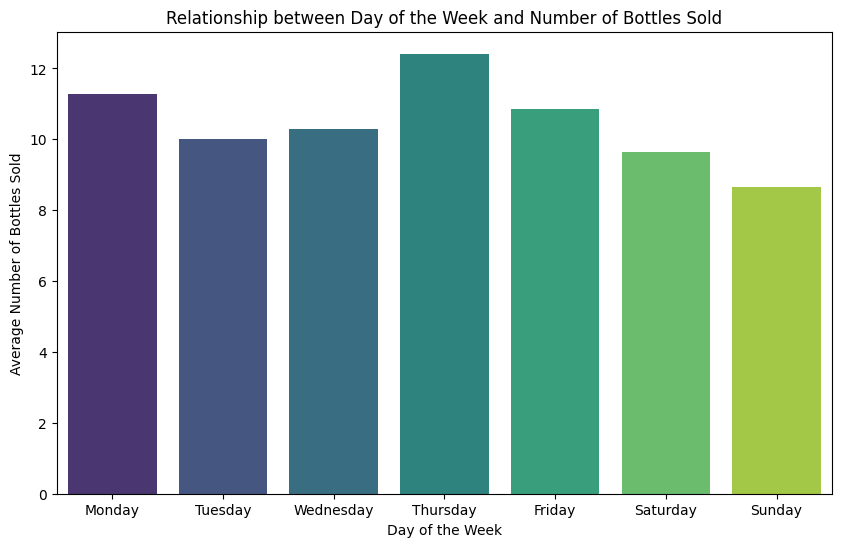

In [31]:
# Convert the 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Add a column for the day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Group data by day of the week and calculate the average number of bottles sold
avg_sales_by_day = df.groupby('day_of_week')['sale_bottles'].mean().reset_index()

# Set the order of the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_sales_by_day['day_of_week'] = pd.Categorical(avg_sales_by_day['day_of_week'], categories=days_order, ordered=True)
avg_sales_by_day = avg_sales_by_day.sort_values('day_of_week')

# Bar plot showing the relationship between the day of the week and the average number of bottles sold
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='sale_bottles', data=avg_sales_by_day, palette='viridis')
plt.title('Relationship between Day of the Week and Number of Bottles Sold')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Bottles Sold')
plt.show()

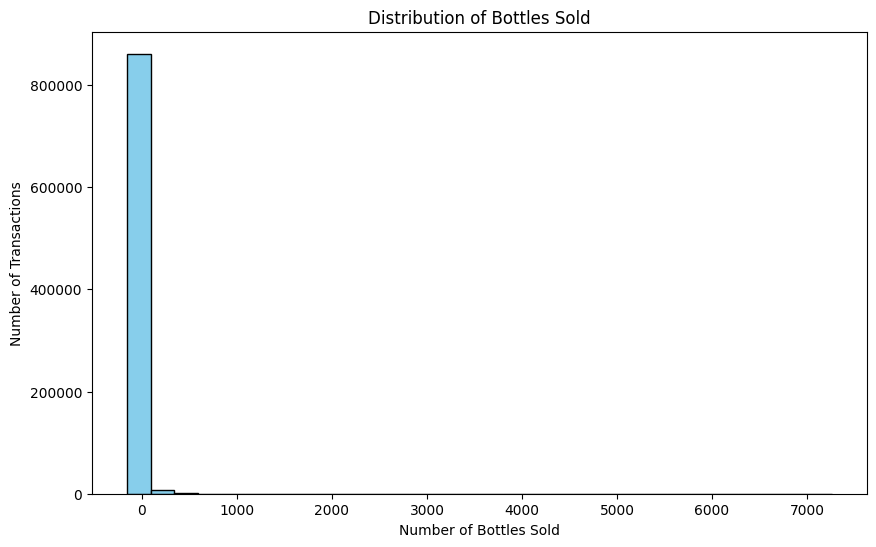

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df['sale_bottles'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Bottles Sold')
plt.xlabel('Number of Bottles Sold')
plt.ylabel('Number of Transactions')
plt.show()

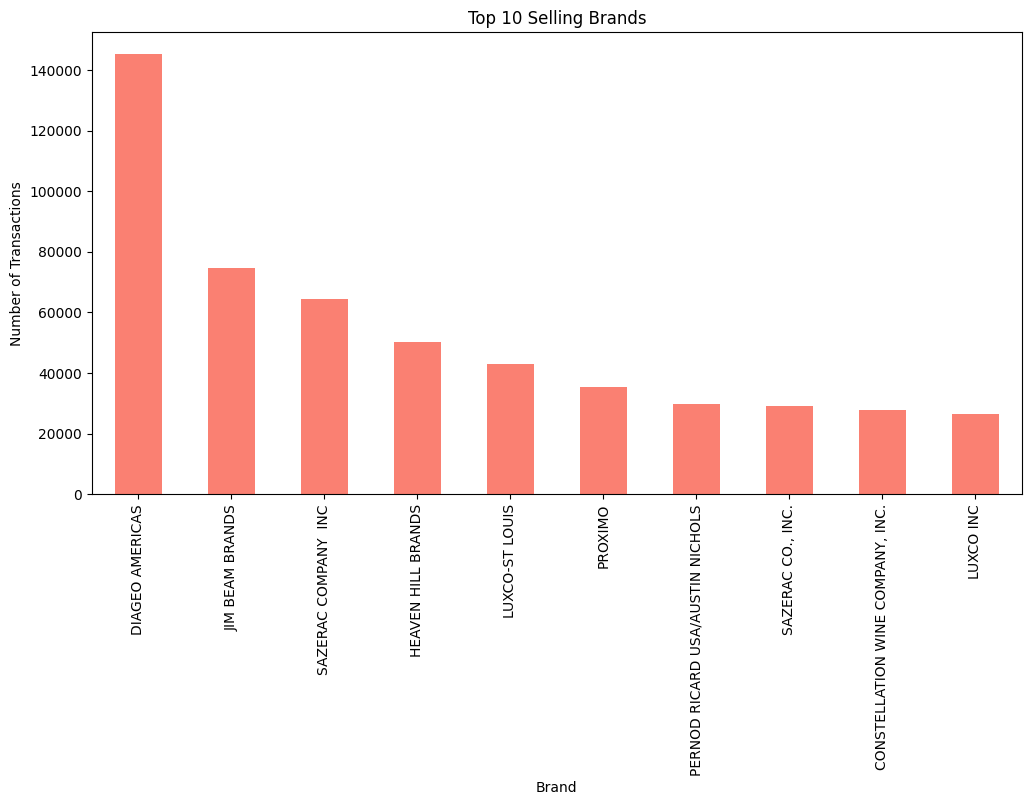

In [33]:
top_brands = df['vendor_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_brands.plot(kind='bar', color='salmon')
plt.title('Top 10 Selling Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Transactions')
plt.show()

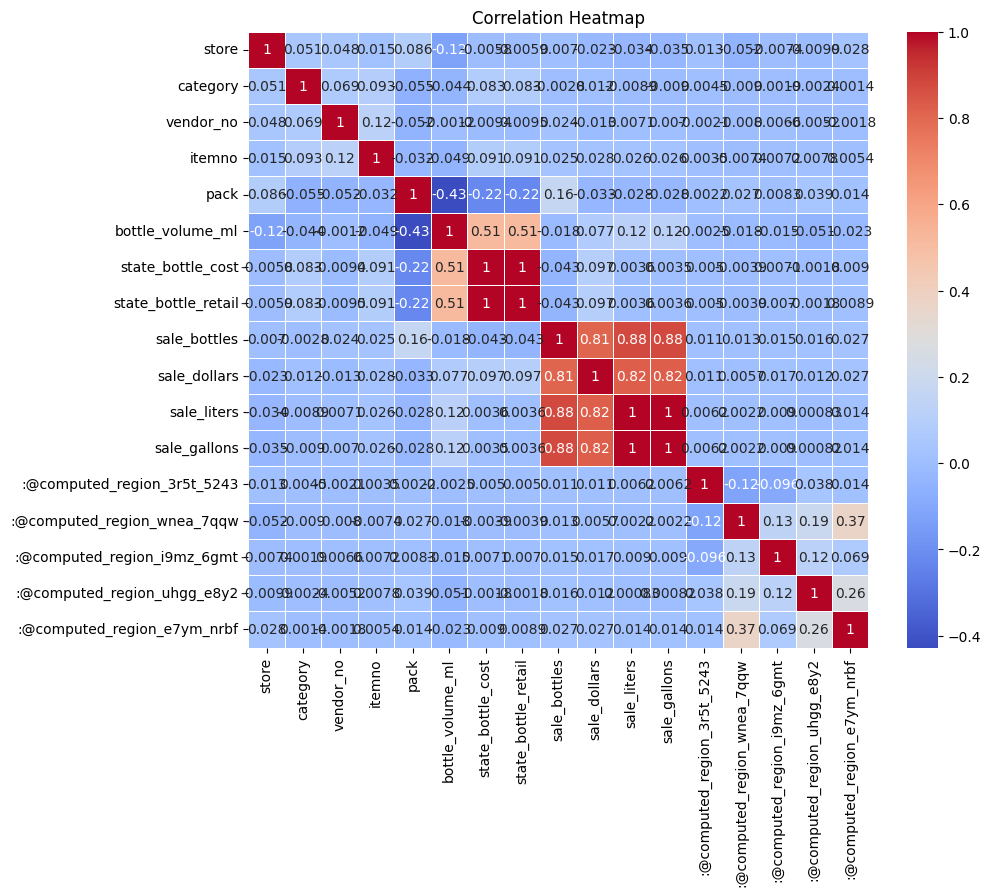

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

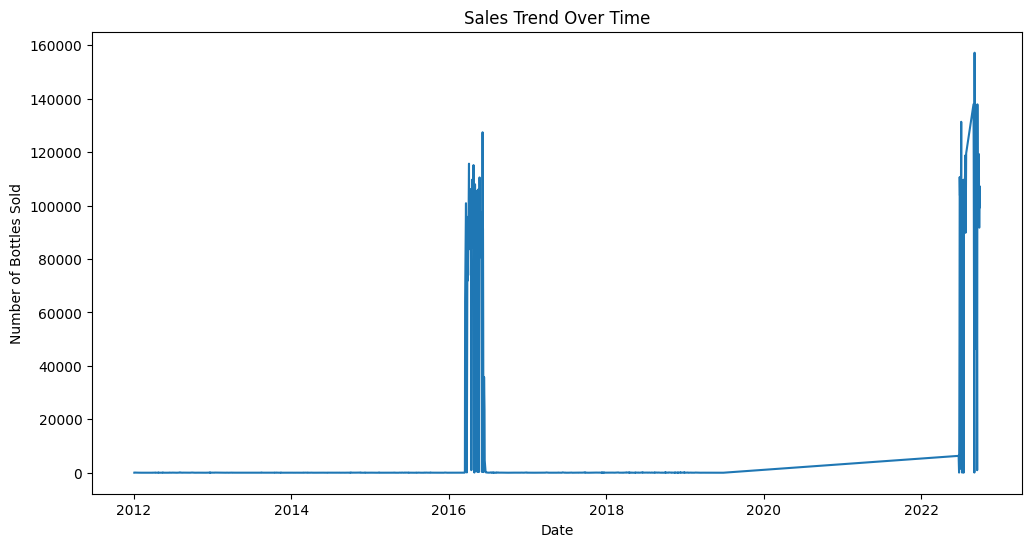

In [36]:
df['date'] = pd.to_datetime(df['date'])
df_time_series = df.groupby('date')['sale_bottles'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(df_time_series['date'], df_time_series['sale_bottles'])
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bottles Sold')
plt.show()

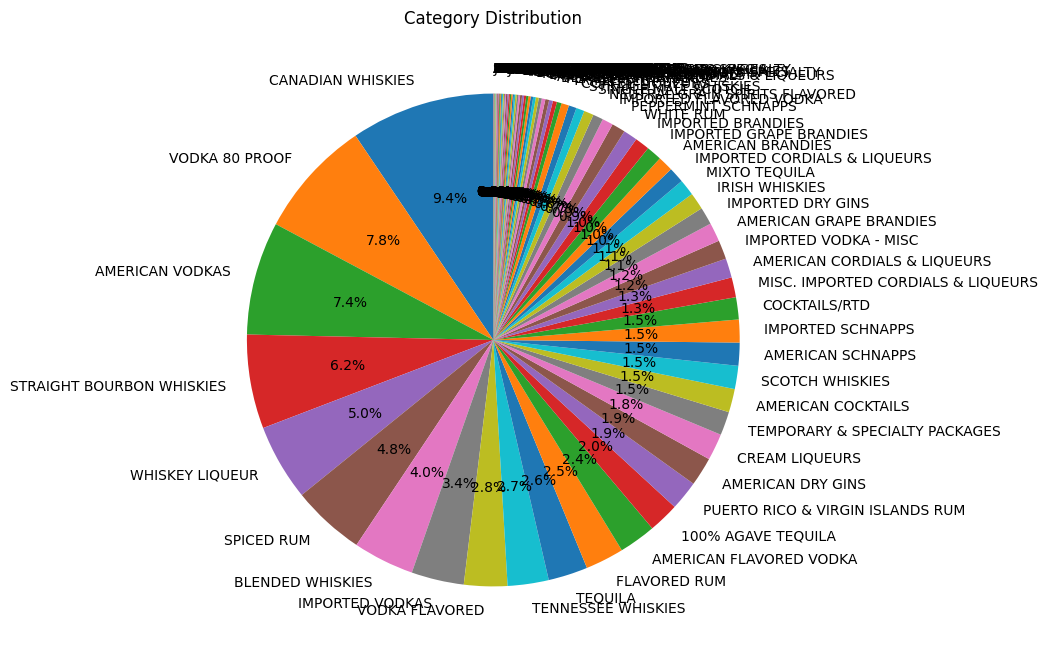

In [37]:
plt.figure(figsize=(10, 8))
df['category_name'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Category Distribution')
plt.ylabel('')
plt.show()

In [38]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='city', palette='viridis')
plt.title('Geographic Distribution of Sales')
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 plt.figure(figsize=(12, 8))                                                                  │
│ ❱ 2 sns.scatterplot(x='Longitude', y='Latitude', data=df, hue='city', palette='viridis')         │
│   3 plt.title('Geographic Distribution of Sales')                                                │
│   4 plt.show()                                                                                   │
│   5                                                                                              │
│                                                                                                  │
│ c:\Users\User\anaconda3\envs\ASI\lib\site-packages\seaborn\relational.py:742 in scatterplot      │
│                                                                                                  │
│ c:\Users\User\anaconda3\envs\ASI\lib\site-packages\seaborn\relational.py:538 in __init__         │
│                                                                                                  │
│ c:\Users\User\anaconda3\envs\ASI\lib\site-packages\seaborn\_oldcore.py:640 in __init__           │
│                                                                                                  │
│ c:\Users\User\anaconda3\envs\ASI\lib\site-packages\seaborn\_oldcore.py:702 in assign_variables   │
│                                                                                                  │
│ c:\Users\User\anaconda3\envs\ASI\lib\site-packages\seaborn\_oldcore.py:938 in                    │
│ _assign_variables_longform                                                                       │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: Could not interpret value `Longitude` for parameter `x`

<Figure size 1200x800 with 0 Axes>

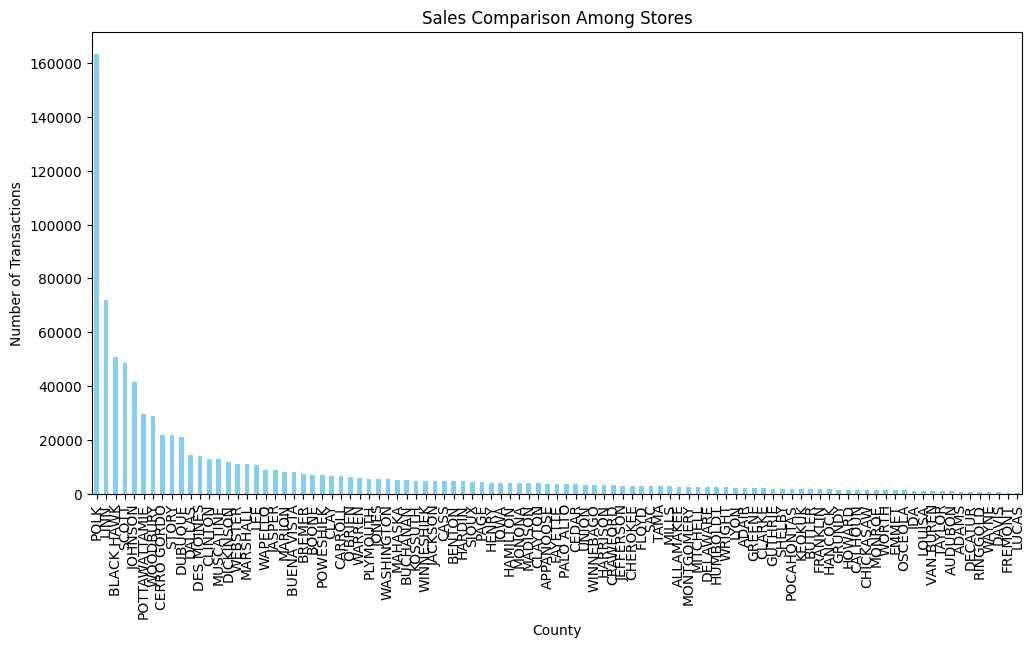

In [41]:
plt.figure(figsize=(12, 6))
df['county'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Sales Comparison Among Stores')
plt.xlabel('County')
plt.ylabel('Number of Transactions')
plt.show()

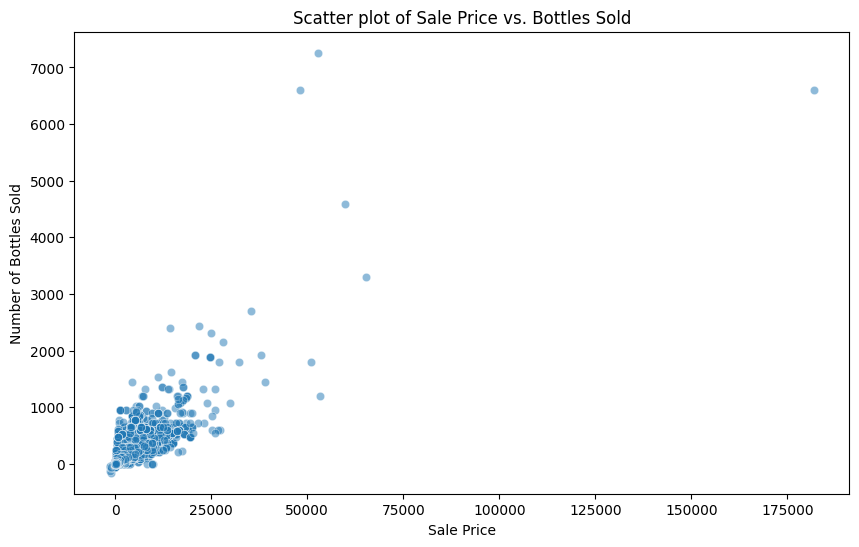

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sale_dollars', y='sale_bottles', data=df, alpha=0.5)
plt.title('Scatter plot of Sale Price vs. Bottles Sold')
plt.xlabel('Sale Price')
plt.ylabel('Number of Bottles Sold')
plt.show()
## 